In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset df = pd.read_csv("C:\\Users\\user\\Downloads\\spotify-2023.csv")


# Load the dataset with a specified encoding
try:
    df = pd.read_csv('C:\\Users\\user\\Downloads\\spotify-2023.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try a different encoding
    df = pd.read_csv("C:\\Users\\user\\Downloads\\spotify-2023.csv", encoding='latin1')

print("Dataset loaded successfully")
print(df.head())


Dataset loaded successfully
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                1

In [3]:
# Rename columns
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}
df.rename(columns=re_col, inplace=True)

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
# Handle missing values
df = df.dropna(subset=['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'key'])
# Convert streams to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
print(df)

# Combine key and mode
df['key_mode'] = df['key'].astype(str) + '_' + df['mode']

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

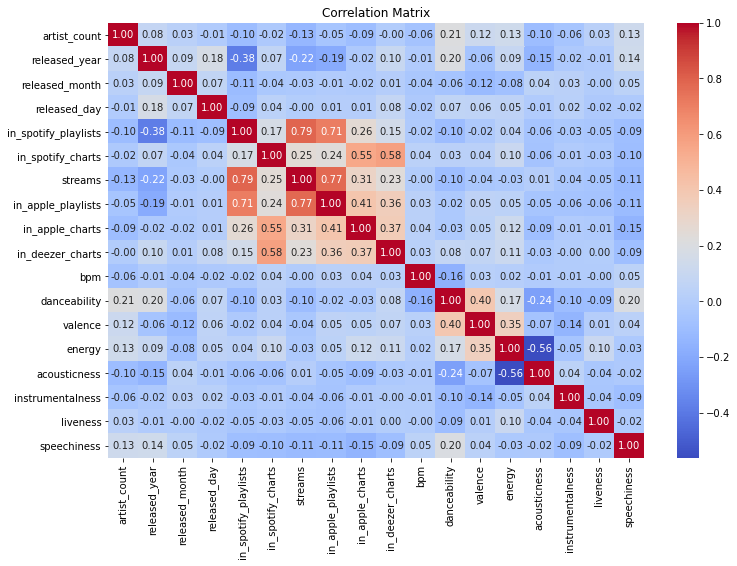

In [5]:
# Explore correlations between numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

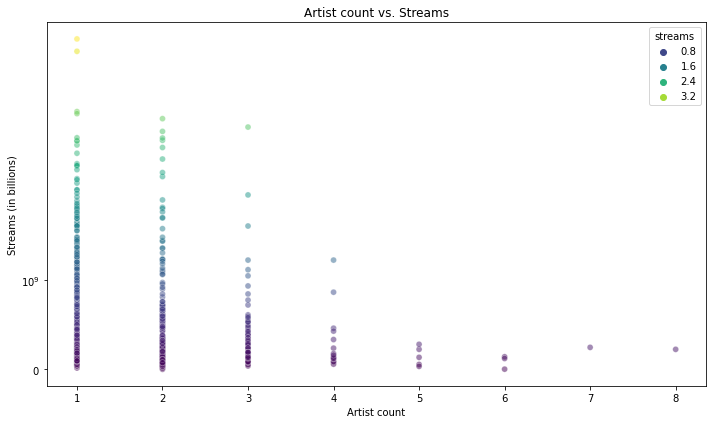

In [6]:
# Artist count vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=df, alpha=0.5, hue='streams', palette='viridis')
plt.title('Artist count vs. Streams')
plt.ylabel('Streams (in billions)')
plt.yscale('symlog', linthresh=3.7e+09)
plt.xlabel('Artist count')
plt.tight_layout()
plt.show()


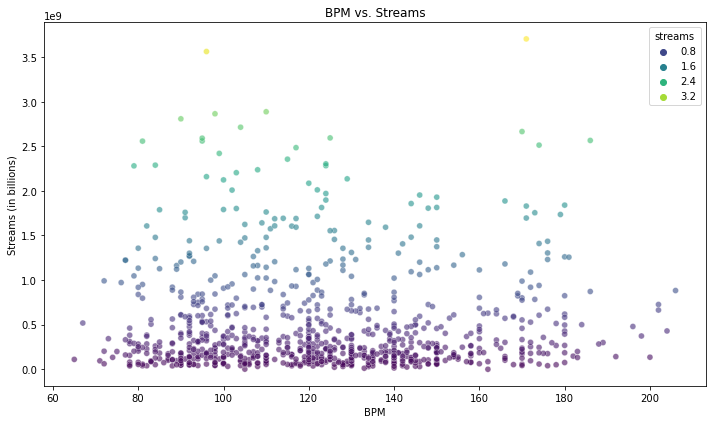

In [7]:
# BPM vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('BPM vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('BPM')
plt.tight_layout()
plt.show()

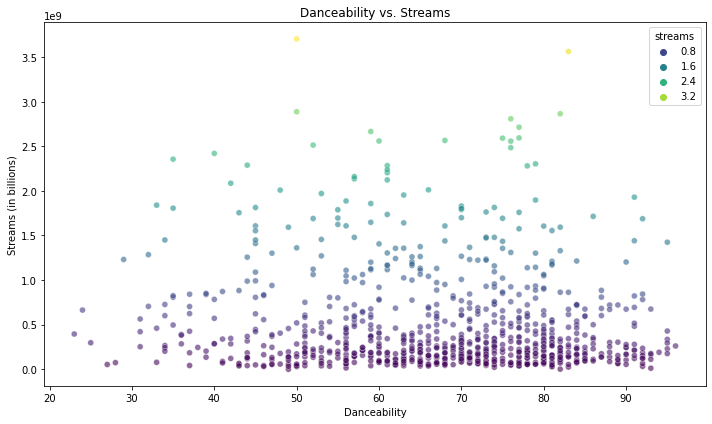

In [8]:
# Danceability vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Danceability vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Danceability')
plt.tight_layout()
plt.show()

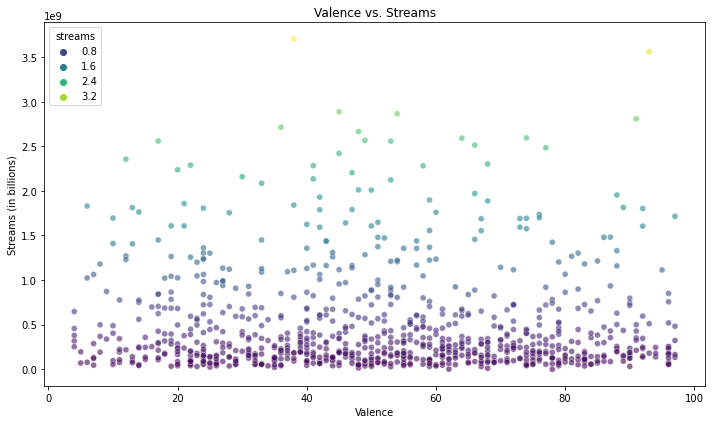

In [9]:
# Valence vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Valence vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Valence')
plt.tight_layout()
plt.show()

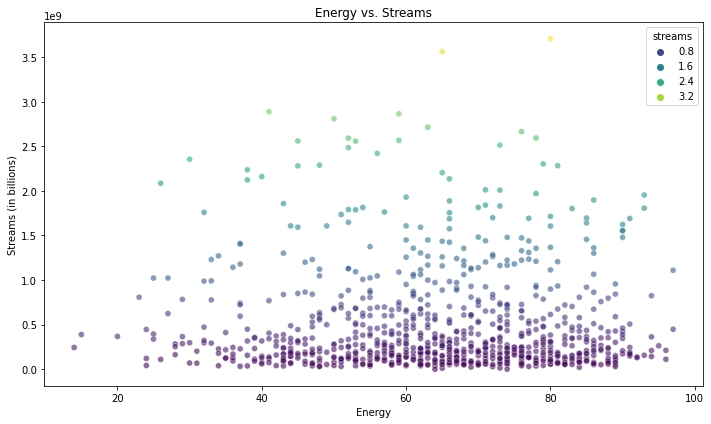

In [10]:
# Energy vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Energy vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Energy')
plt.tight_layout()
plt.show()

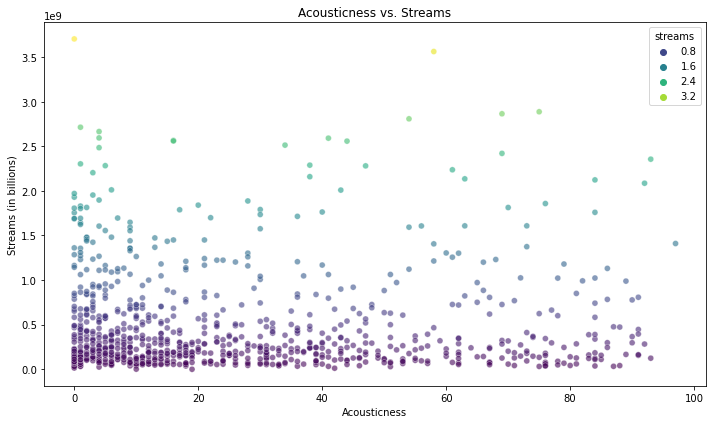

In [11]:
# Acousticness vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Acousticness vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Acousticness')
plt.tight_layout()
plt.show()


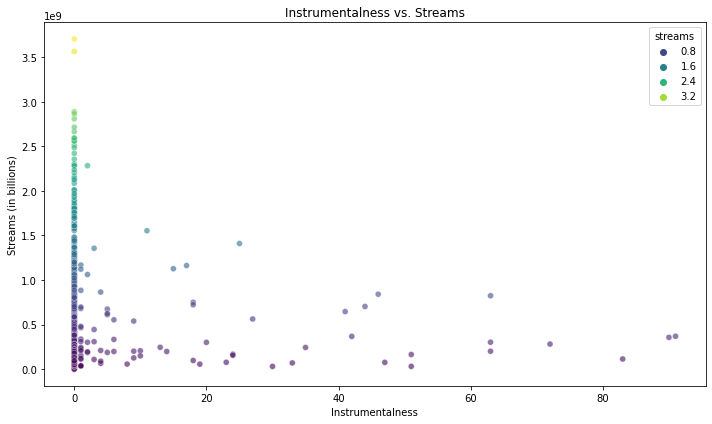

In [12]:
# Instrumentalness vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Instrumentalness vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Instrumentalness')
plt.tight_layout()
plt.show()


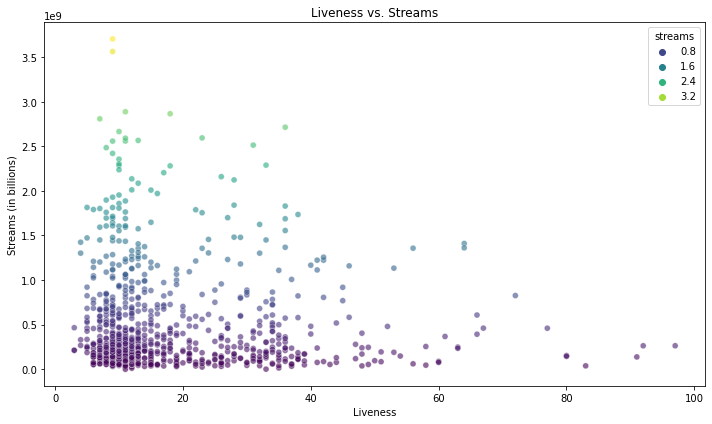

In [13]:
# Liveness vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Liveness vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Liveness')
plt.tight_layout()
plt.show()


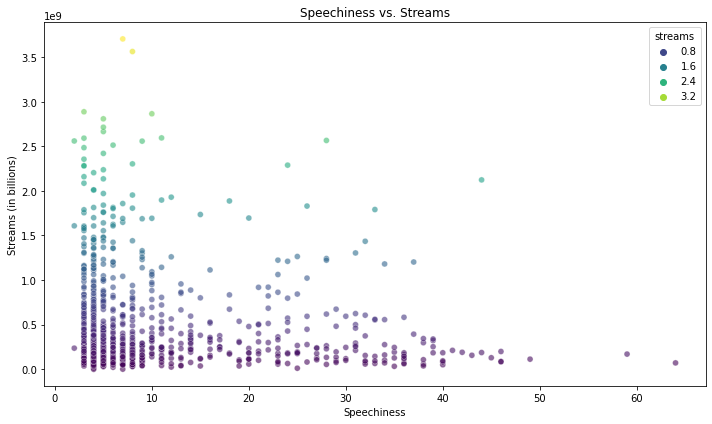

In [14]:
# Speechiness vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speechiness', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Speechiness vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Speechiness')
plt.tight_layout()
plt.show()

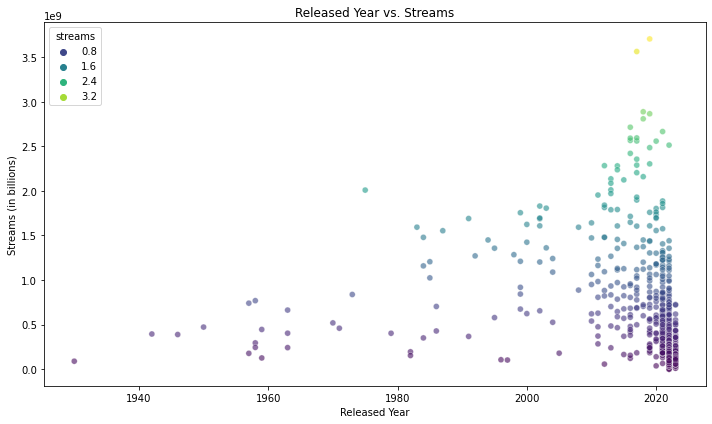

In [15]:
# Released Year vs. Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='released_year', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Released Year vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Released Year')
plt.tight_layout()
plt.show()

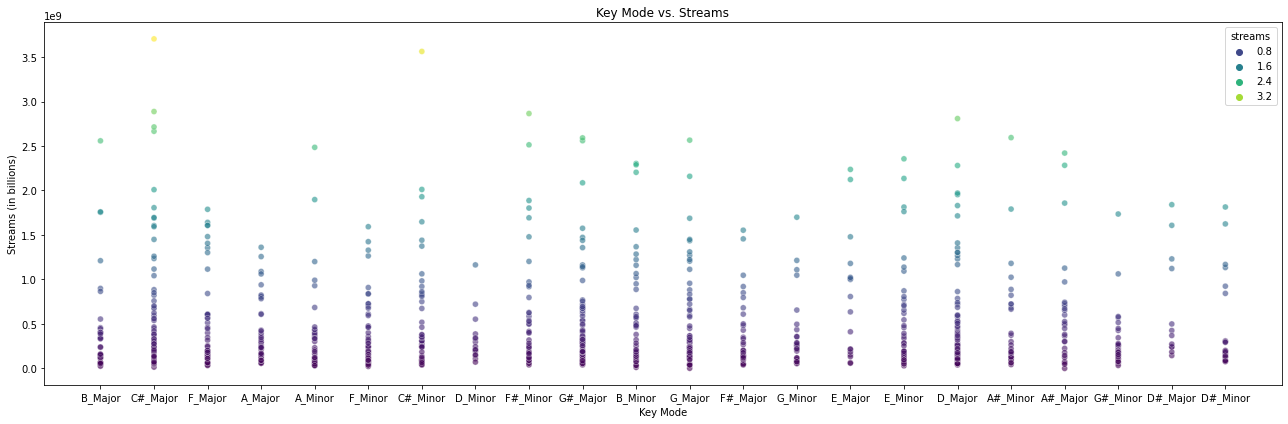

In [16]:
# Key Mode vs. Streams
plt.figure(figsize=(18, 6))
sns.scatterplot(x='key_mode', y='streams', data=df, alpha=0.6, hue='streams', palette='viridis')
plt.title('Key Mode vs. Streams')
plt.ylabel('Streams (in billions)')
plt.xlabel('Key Mode')
plt.tight_layout()
plt.show()

In [17]:
import matplotlib.pyplot as plt

# List of features to analyze
features_to_analyze = ['released_year', 'speechiness', 'liveness', 'instrumentalness',
                        'acousticness', 'energy', 'valence', 'danceability', 'bpm', 'artist_count','key_mode','streams']

for feature in features_to_analyze:
    print(f"\nAnalysis for feature: {feature}\n{'=' * 40}")

    # Gathering statistics to analyze
    feature_stats = df[feature].describe()
    print(f"Summary statistics for {feature}:\n{feature_stats}\n")


Analysis for feature: released_year
Summary statistics for released_year:
count     858.000000
mean     2018.241259
std        11.107781
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64


Analysis for feature: speechiness
Summary statistics for speechiness:
count    858.000000
mean      10.388112
std       10.088162
min        2.000000
25%        4.000000
50%        6.000000
75%       12.000000
max       64.000000
Name: speechiness, dtype: float64


Analysis for feature: liveness
Summary statistics for liveness:
count    858.000000
mean      18.173660
std       13.561611
min        3.000000
25%       10.000000
50%       12.000000
75%       24.000000
max       97.000000
Name: liveness, dtype: float64


Analysis for feature: instrumentalness
Summary statistics for instrumentalness:
count    858.000000
mean       1.609557
std        8.565909
min        0.000000
25%        0.000000
50%        0.000

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

First few rows of X_train:
     bpm  danceability  valence  energy  acousticness
218   90            62        7      62             6
580  122            77       51      79             5
442  107            74       88      65            28
821   98            76       79      81            18
356  176            72       96      63            25

First few rows of y_train:
218    0.012457
580    0.098131
442    0.312961
821    0.019283
356    0.047355
Name: streams, dtype: float64
Mean Squared Error: 2.8545841028882794e+17


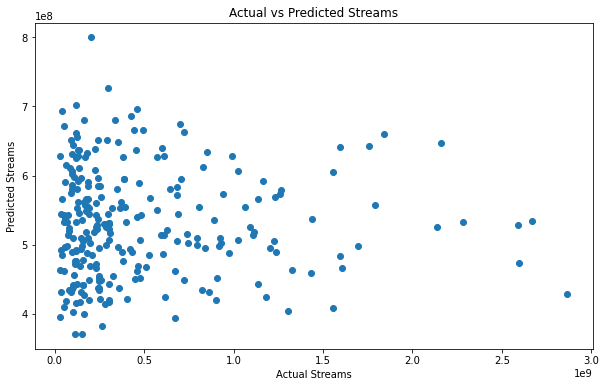

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Initialize a scaler
scaler = MinMaxScaler()
# Fit the scaler to the 'streams' data and transform it
df['streams'] = scaler.fit_transform(df[['streams']])
# Select relevant features for the model
features = ['bpm', 'danceability', 'valence', 'energy', 'acousticness']
target_variable = 'streams'
#Drop rows with missing info
df = df.dropna(subset=[target_variable])

X = df[features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Print the first few rows of X_train and y_train for inspection
print("First few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of y_train:")
print(y_train.head())

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Apply inverse transformation to y_pred
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Apply inverse transformation to y_test
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Now, calculate the MSE
mse = mean_squared_error(y_test_orig, y_pred_orig)
print(f'Mean Squared Error: {mse}')

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_orig)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams')
plt.show()




In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: -0.03198120419133876
Mean Absolute Error (MAE): 0.10987532652402408
Root Mean Squared Error (RMSE): 0.14424908600547132


In [22]:
# Exclude non-numeric columns before correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
correlation_matrix

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
artist_count,1.000000,0.076616,0.032990,-0.011917,-0.100919,-0.020673,-0.131273,-0.055404,-0.095824,-0.003529,-0.063419,0.207636,0.117233,0.135091,-0.101232,-0.055208,0.032083,0.131129
released_year,0.076616,1.000000,0.083459,0.171435,-0.387940,0.068413,-0.222450,-0.196616,-0.029040,0.096896,-0.010362,0.200100,-0.055269,0.097239,-0.150987,-0.020374,-0.011370,0.134253
released_month,0.032990,0.083459,1.000000,0.068443,-0.109876,-0.037911,-0.026944,-0.010285,-0.017907,0.008414,-0.043506,-0.063124,-0.114357,-0.077919,0.043163,0.034562,-0.003034,0.045511
released_day,-0.011917,0.171435,0.068443,1.000000,-0.088851,0.036835,-0.000371,0.009003,0.004471,0.079907,-0.021101,0.064164,0.056769,0.053526,-0.009193,0.023780,-0.021384,-0.016784
in_spotify_playlists,-0.100919,-0.387940,-0.109876,-0.088851,1.000000,0.173381,0.787825,0.708076,0.259238,0.147740,-0.018566,-0.103279,-0.021648,0.039666,-0.056214,-0.031697,-0.049014,-0.090344
in_spotify_charts,-0.020673,0.068413,-0.037911,0.036835,0.173381,1.000000,0.252665,0.234889,0.551774,0.581722,0.039211,0.030249,0.036794,0.105216,-0.064086,-0.007873,-0.029890,-0.098284
streams,-0.131273,-0.222450,-0.026944,-0.000371,0.787825,0.252665,1.000000,0.774445,0.313651,0.233967,-0.002163,-0.100702,-0.042787,-0.029714,0.010798,-0.043068,-0.054275,-0.112896
in_apple_playlists,-0.055404,-0.196616,-0.010285,0.009003,0.708076,0.234889,0.774445,1.000000,0.408485,0.359006,0.030178,-0.025617,0.052390,0.045562,-0.050028,-0.061521,-0.063207,-0.108237
in_apple_charts,-0.095824,-0.029040,-0.017907,0.004471,0.259238,0.551774,0.313651,0.408485,1.000000,0.370896,0.034633,-0.028701,0.046622,0.124038,-0.088594,-0.007183,-0.014382,-0.150397
in_deezer_charts,-0.003529,0.096896,0.008414,0.079907,0.147740,0.581722,0.233967,0.359006,0.370896,1.000000,0.028047,0.075402,0.073120,0.114448,-0.027511,-0.002874,0.001612,-0.089746


In [51]:
# Drop non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns].drop(['streams'], axis=1)
y = df['streams']

# Handle missing values
X = X.fillna(0)

# Encode category variables
X = pd.get_dummies(X)

# Split the data and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Check the coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance

,Feature,Coefficient
0,artist_count,-0.008463
1,released_year,0.000656
2,released_month,0.001335
3,released_day,0.000801
4,in_spotify_playlists,0.000010
5,in_spotify_charts,0.000884
6,in_apple_playlists,0.000726
7,in_apple_charts,-0.000116
8,in_deezer_charts,-0.001396
9,bpm,-0.000034


In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.8037679739649719
Mean Absolute Error (MAE): 0.05692503095527406
Root Mean Squared Error (RMSE): 0.08079646946486811


In [29]:
# Apply inverse transformation to y_pred
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Apply inverse transformation to y_test
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1))


In [31]:
# Apply inverse transformation to y_pred
X_pred_orig = scaler.inverse_transform(X_test.values.reshape(-1, 1))

In [16]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.7093145323422914
Mean Absolute Error (MAE): 0.05742690918793712
Root Mean Squared Error (RMSE): 0.07759114140123068


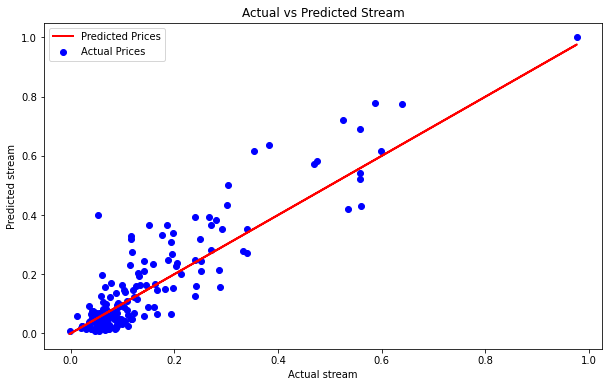

In [35]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_orig, y_test_orig, color='blue', label='Actual Prices')
plt.plot(y_pred_orig, y_pred_orig, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Actual stream')
plt.ylabel('Predicted stream')
plt.legend()
plt.title('Actual vs Predicted Stream')
plt.show()